In [88]:
import json
import seaborn as sns
import pandas as pd; import seaborn as sns; import numpy as np
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [139]:
df = pd.read_json('util/global_sums_no_bots_imports_tiger.json')
df['sum'] = df.apply(lambda row: row.highway+row.amenity+row.building+row.other,axis=1)
df = df.sort_index()

In [140]:
df.head()

,highway,amenity,building,other,sum
1,60701451.0,7814636.0,231497606.0,135910473.0,435924166.0
2,26113881.0,2827392.0,31665823.0,38810758.0,99417854.0
3,13796450.0,1249835.0,9735121.0,15245450.0,40026856.0
4,7740641.0,609700.0,3420945.0,6196145.0,17967431.0
5,4706275.0,321386.0,1382303.0,3107873.0,9517837.0


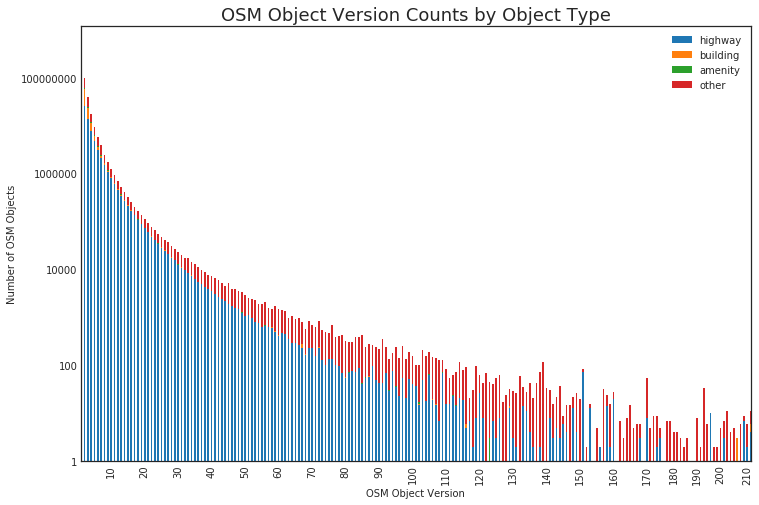

In [141]:
sns.set_style('white')
ax = df[['highway','building','amenity','other']].plot(stacked=True, kind='bar', figsize=(12,8),logy=True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.set_xlim([0,200])
ax.set_title("OSM Object Version Counts by Object Type",fontsize=18)
ax.set_xlabel("OSM Object Version")
ax.set_ylabel("Number of OSM Objects");

for label in ax.xaxis.get_ticklabels():
    if int(label.get_text()) %10 != 0:
        label.set_visible(False)

In [142]:
df['sum'].sum() - df.iloc[0]['sum']

186676089.0

In [143]:
df.head()

,highway,amenity,building,other,sum
1,60701451.0,7814636.0,231497606.0,135910473.0,435924166.0
2,26113881.0,2827392.0,31665823.0,38810758.0,99417854.0
3,13796450.0,1249835.0,9735121.0,15245450.0,40026856.0
4,7740641.0,609700.0,3420945.0,6196145.0,17967431.0
5,4706275.0,321386.0,1382303.0,3107873.0,9517837.0


In [144]:
df.sum()

highway     124428896.0
amenity      13297331.0
building    278953383.0
other       205935756.0
sum         622600255.0
dtype: float64